In [1]:
# Helpful Python packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./HAR-data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./HAR-data/.DS_Store
./HAR-data/reference/.DS_Store
./HAR-data/reference/BRJ-2022-12-1908.05.06-upstairs.csv
./HAR-data/reference/BRJ-2022-12-1908.09.53-walking-standing-walking-onTable.csv
./HAR-data/reference/BRJ-2022-12-1908.02.39-standing.csv
./HAR-data/reference/BRJ-2022-12-1908.03.34-walking.csv
./HAR-data/reference/BRJ-2022-12-1908.04.30-downstairs.csv
./HAR-data/reference/BRJ-2022-12-1908.05.35-walkingWithCurves.csv


In [2]:
# Select a file for the case you want to analyze
dataset = pd.read_csv("HAR-data/reference/BRJ-2022-12-1908.04.30-downstairs.csv", delimiter=";", decimal=",")
dataset.describe()

,time,gFx,gFy,gFz,TgF
count,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000
mean,6.835686,0.066159,0.295233,0.968217,1.020675
std,3.953105,0.062969,0.085608,0.198905,0.195063
min,0.003603,-0.143900,0.023900,0.523800,0.626000
25%,3.412710,0.026600,0.228400,0.822600,0.877000
50%,6.834416,0.059900,0.293200,0.962300,1.004000
75%,10.260179,0.101150,0.351800,1.098900,1.146000
max,13.679697,0.361300,0.550400,1.635600,1.637000


In [3]:
# Duration of acceleration record
duration = dataset['time'][dataset.index[-1]]
# Acquisition frequency
fs = dataset[ (dataset['time']>0) & (dataset['time']<1) ]['TgF'].count()
# Interval between consecutive points (milliseconds)
interval = (1/fs) * 1000
print("%.1f seconds serie, interval between consecutive points = %.1f milliseconds" % (duration, interval) )

13.7 seconds serie, interval between consecutive points = 5.0 milliseconds


In [4]:
# Set index of dataframe to be 'time' column
dataset.set_index('time', inplace = True)
dataset.head()

,gFx,gFy,gFz,TgF
time,,,,
0.003603,0.0459,0.1534,1.0119,1.025
0.004062,0.0469,0.1534,1.0324,1.045
0.004264,0.0528,0.1549,1.0447,1.057
0.008954,0.0567,0.1583,1.0510,1.064
0.011790,0.0559,0.1627,1.0598,1.074


# Exploratory Data Analysis
## Time series of vibration data
Let's follow the tutorial https://machinelearningmastery.com/time-series-data-visualization-with-python/

In [5]:
# Select a subset of the vibration records
time_serie = dataset #['TgF']

## Graphics of temporal evolution: all in one graph
The next plots show the time series of the 4 accelerometers placed in the gearbox

In [6]:
# Import Python libraries for graphical representations
import matplotlib.pyplot as plt
from pylab import rcParams

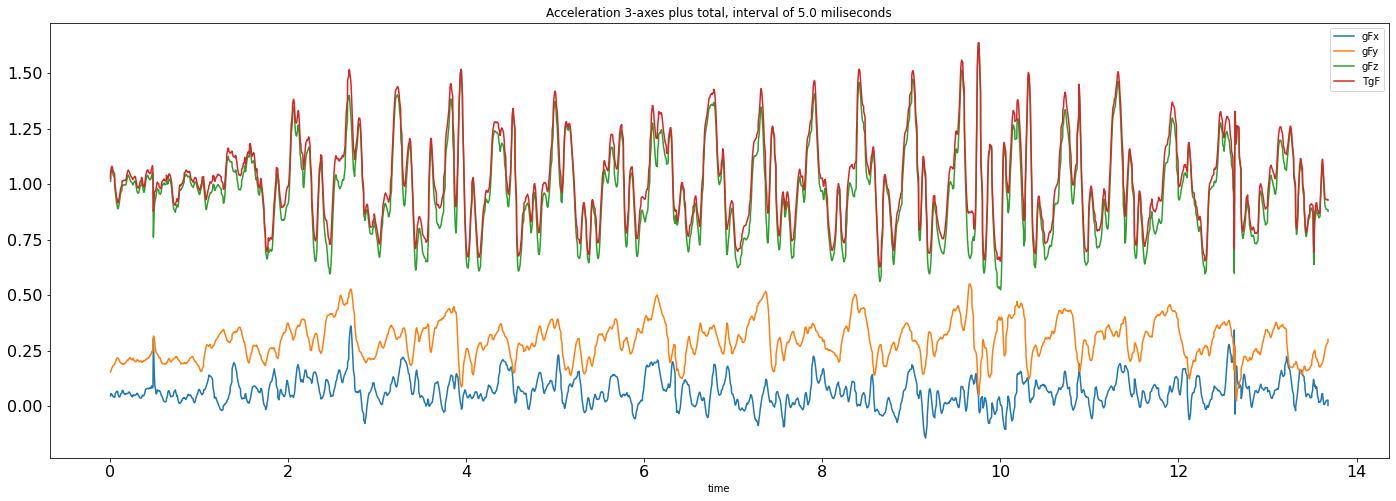

In [7]:
rcParams['figure.figsize'] = 24, 8
time_serie.plot(title="Acceleration 3-axes plus total, interval of %.1f miliseconds" %interval, fontsize=16)
plt.show()

## Histogram of the four vibration signals
Each plot shows the histogram for each of the 4 accelerations a1, a2, a3, a4

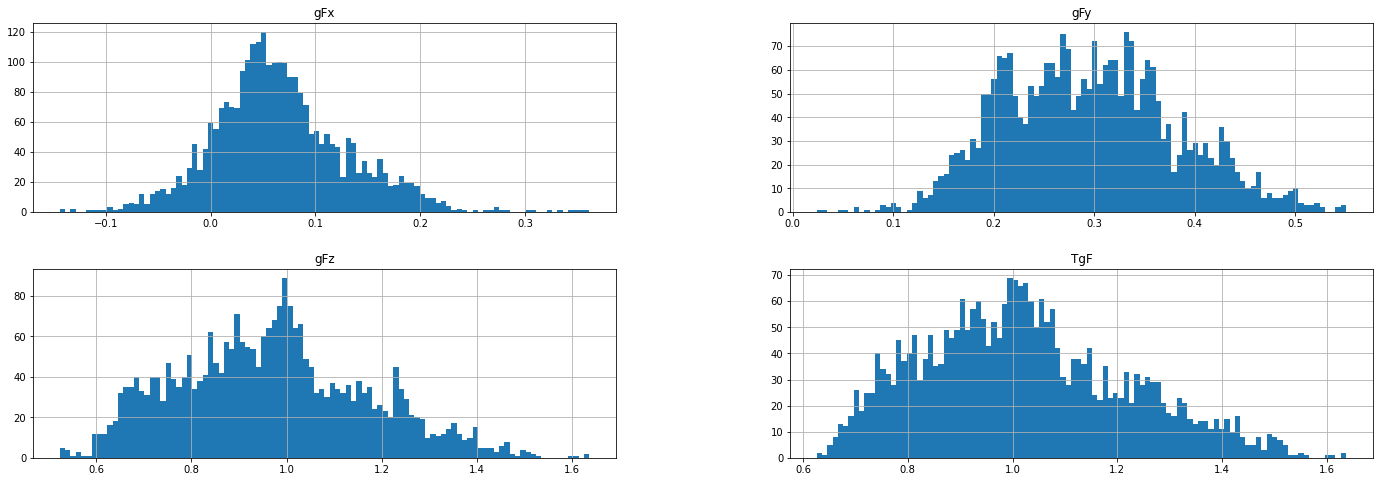

In [8]:
time_serie.hist(bins=100)
plt.show()

## Plots of probability density functions of vibration signals
KDE Plot described as *Kernel Density Estimate* is used for visualizing the Probability Density of a continuous variable

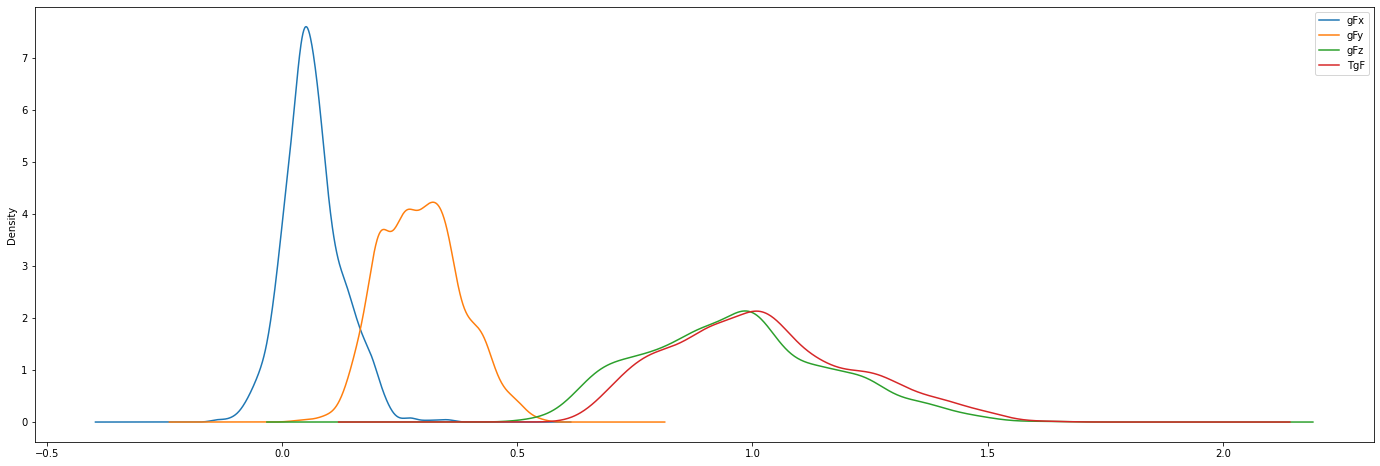

In [9]:
time_serie.plot(kind='kde')
#plt.xlim(-3, 3)
plt.show()

## Autocorrelation for a1 vibration signal
y(t+1) vs. y(t) values

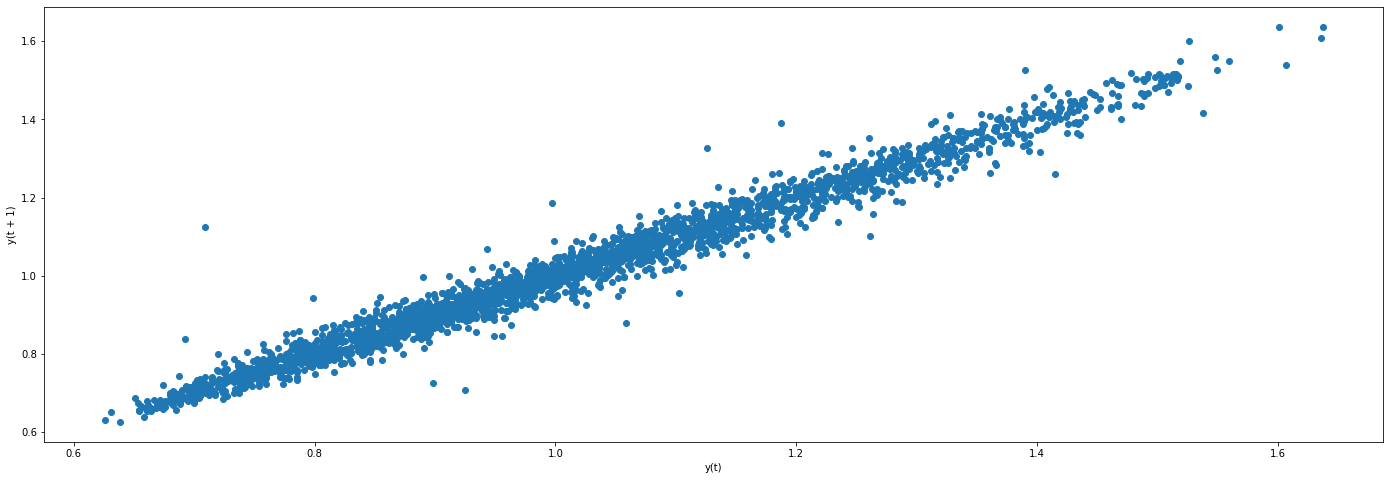

In [10]:
from pandas.plotting import lag_plot

lag_plot(time_serie['TgF'])
plt.show()

And as a function of the lag value: y(t+lag) vs. y(t) values

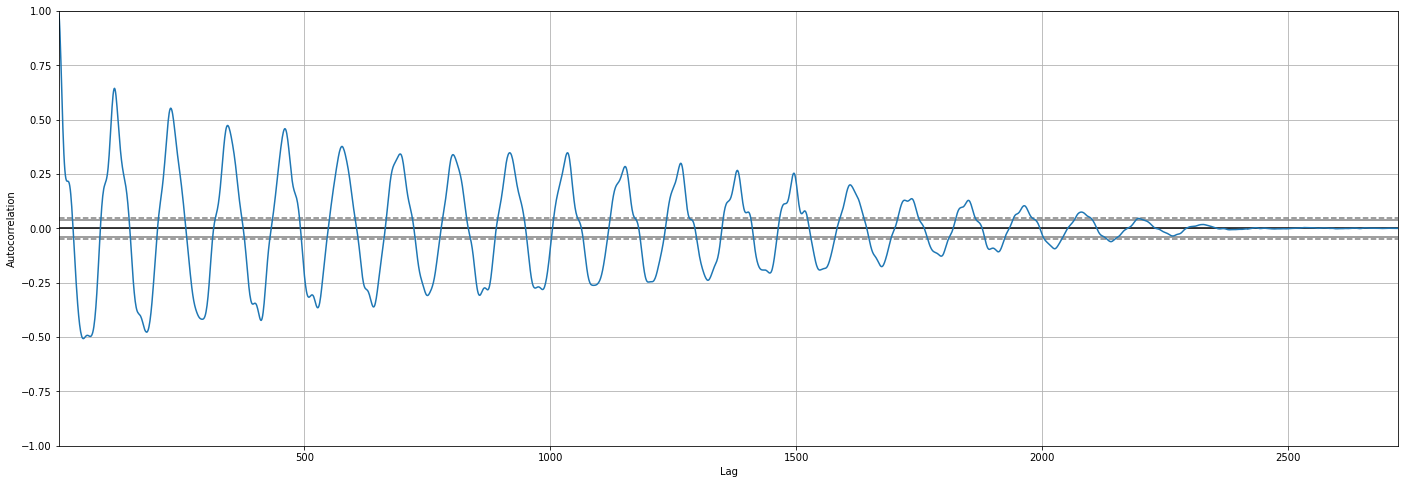

In [11]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(time_serie['TgF'])
plt.show()